In [1]:
import os
import sys
from pathlib import Path
# Setting the working directory to the root of the project
project_dir = Path("C:/Users/adbou/source/repos/KFHXRelatedAi/")
os.chdir(project_dir)

from Configs.GeneralPaths import SOURCEDATA
import pandas as pd
import numpy as np

In [2]:
#load user transactions data
reward_transactions = pd.read_excel(Path(SOURCEDATA / "TAM_Cleaned_Deals.xlsx"))
reward_transactions.head()
reward_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413444 entries, 0 to 413443
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   EntityId                   413444 non-null  int64         
 1   EntityName                 413444 non-null  object        
 2   TrxId                      413444 non-null  int64         
 3   TrxDate                    413444 non-null  datetime64[ns]
 4   Acronym                    413444 non-null  object        
 5   MerchantName               413444 non-null  object        
 6   Currency                   413444 non-null  object        
 7   FK_BusinessUserId          413444 non-null  int64         
 8   PointsRewarded             413444 non-null  int64         
 9   FK_TierId                  413444 non-null  int64         
 10  Tier                       413444 non-null  object        
 11  Location                   413444 non-null  object  

In [3]:
reward_transactions.head()

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services


In [7]:
unique_detailed_mcc_df = reward_transactions[['MCC', 'Detailed MCC']].drop_duplicates().reset_index(drop=True)


In [8]:
unique_detailed_mcc_df

,MCC,Detailed MCC
0,5812,Restaurants and Food Services
1,5732,Electronics and Appliances
2,7230,Personal Services - Hair Care
3,4814,Technology and Communication Services
4,5262,Digital Goods-Market
...,...,...
73,7393,Security Services
74,5969,Direct Marketing
75,5972,Specialty Stores - Stamp and Coin Supplies
76,7251,Footwear and Accessories Maintenance


In [9]:
unique_detailed_mcc_df.to_excel(Path(SOURCEDATA / "Unique_Detailed_MCC.xlsx"),index=False)

In [6]:
nan_counts = reward_transactions.isnull().sum()
print(nan_counts)

EntityId                     0
EntityName                   0
TrxId                        0
TrxDate                      0
Acronym                      0
MerchantName                 0
Currency                     0
FK_BusinessUserId            0
PointsRewarded               0
FK_TierId                    0
Tier                         0
Location                     0
TotalPaid                    0
MCC                          0
MCC Details                  0
MCC General Category         0
MCC More General Category    0
Month                        0
Season                       0
Detailed MCC                 0
dtype: int64


In [7]:
reward_transactions = reward_transactions[reward_transactions['PointsRewarded'] >= 0]

In [8]:
reward_transactions

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413439,1455,Non Participating,25769345,2024-07-07 03:00:00,CHICK-FIL-A #01107 540-362-1160 VA,CHICK-FIL-A #01107,KWD,1002922,11,1847,Super Hero,US,1.11,5812,Fast Food Restaurants,Fast Food Restaurants,Restaurants and Food Services,7,Summer,Restaurants and Food Services
413440,1455,Non Participating,25769346,2024-07-07 03:00:00,WEIXIN*Didi Chuxing Shenzhen CN,WEIXIN*Didi Chuxing Shenzhen,KWD,1012208,0,1846,Hero,CN,0.39,5712,Repair Shops and Related Services –Miscellaneous,Miscellaneous Repair Shops,Services and Utilities,7,Summer,Home and Property Services
413441,1455,Non Participating,25769347,2024-07-07 03:00:00,ALIPAY BEIJING CN,ALIPAY,KWD,1012208,0,1846,Hero,CN,0.96,5399,Department Stores,Department Stores,Retail Stores,7,Summer,Retail Stores
413442,1455,Non Participating,25769348,2024-07-07 03:00:00,GS25 JONGRO IKSUNJUM SEOUL KR,GS25 JONGRO IKSUNJUM SEOUL,KWD,1105144,0,1846,Hero,KR,0.94,5399,Variety Stores,Variety Stores,Retail Stores,7,Summer,Retail Stores


count    17825.000000
mean        23.125610
std         56.842701
min          1.000000
25%          2.000000
50%          6.000000
75%         15.000000
max        880.000000
Name: count, dtype: float64


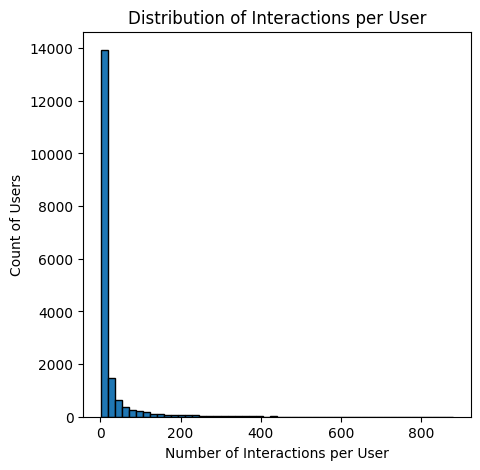

In [9]:
# Count the number of interactions per user
user_interaction_counts = reward_transactions['FK_BusinessUserId'].value_counts()

# Summary statistics
print(user_interaction_counts.describe())

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.hist(user_interaction_counts, bins=50, edgecolor='k')
plt.xlabel('Number of Interactions per User')
plt.ylabel('Count of Users')
plt.title('Distribution of Interactions per User')
plt.show()

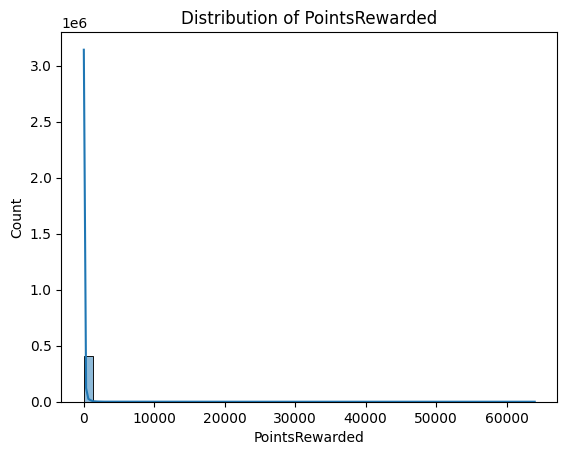

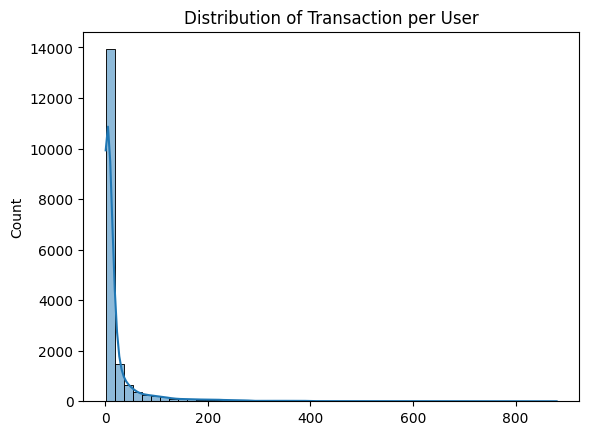

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of PointsRedeemed
sns.histplot(reward_transactions['PointsRewarded'], bins=50, kde=True)
plt.title('Distribution of PointsRewarded')
plt.show()

# Visualizing the distribution of transactions per user
user_redemptions = reward_transactions.groupby('FK_BusinessUserId').size()
sns.histplot(user_redemptions, bins=50, kde=True)
plt.title('Distribution of Transaction per User')
plt.show()

In [11]:
# Basic summary statistics for the entire dataset
print(reward_transactions.describe())

# Summary statistics by EntityName
print(reward_transactions.groupby('EntityName').describe())

print(reward_transactions.groupby('Tier').describe())

            EntityId         TrxId                        TrxDate  \
count  412214.000000  4.122140e+05                         412214   
mean     1456.076327  2.192138e+07  2024-04-18 09:18:18.408107520   
min      1455.000000  1.781918e+07            2024-01-01 03:00:00   
25%      1455.000000  1.975914e+07            2024-03-05 03:00:00   
50%      1455.000000  2.195760e+07            2024-04-24 03:00:00   
75%      1455.000000  2.401117e+07            2024-06-03 03:00:00   
max      1808.000000  2.576935e+07            2024-07-07 03:00:00   
std        14.680902  2.376708e+06                            NaN   

       FK_BusinessUserId  PointsRewarded      FK_TierId      TotalPaid  \
count       4.122140e+05   412214.000000  412214.000000  412214.000000   
mean        1.021347e+06      105.158784    1846.317228       9.200352   
min         9.764810e+05        0.000000    1845.000000      -0.990000   
25%         9.960360e+05       16.000000    1845.000000       1.500000   
50%     

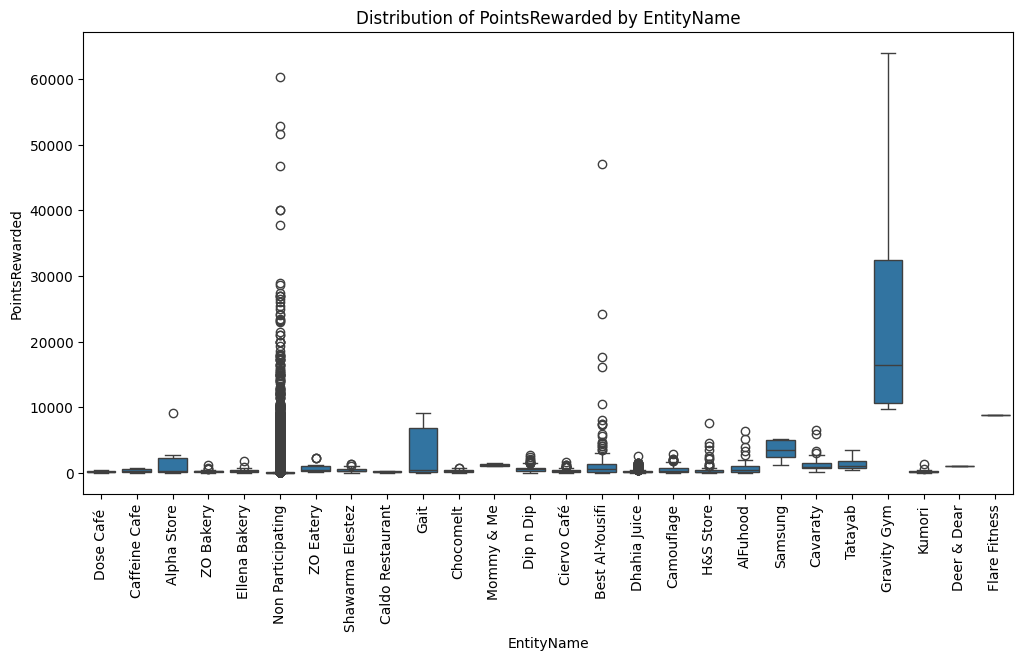

In [12]:
# Distribution of PointsRewarded by EntityName
plt.figure(figsize=(12, 6))
sns.boxplot(x='EntityName', y='PointsRewarded', data=reward_transactions)
plt.xticks(rotation=90)
plt.title('Distribution of PointsRewarded by EntityName')
plt.show()

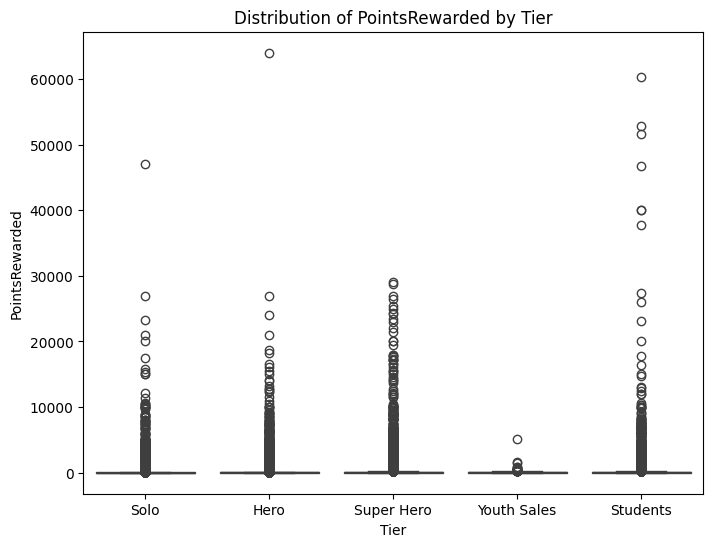

In [13]:
# Distribution of PointsRewarded by Tier
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tier', y='PointsRewarded', data=reward_transactions)
plt.title('Distribution of PointsRewarded by Tier')
plt.show()

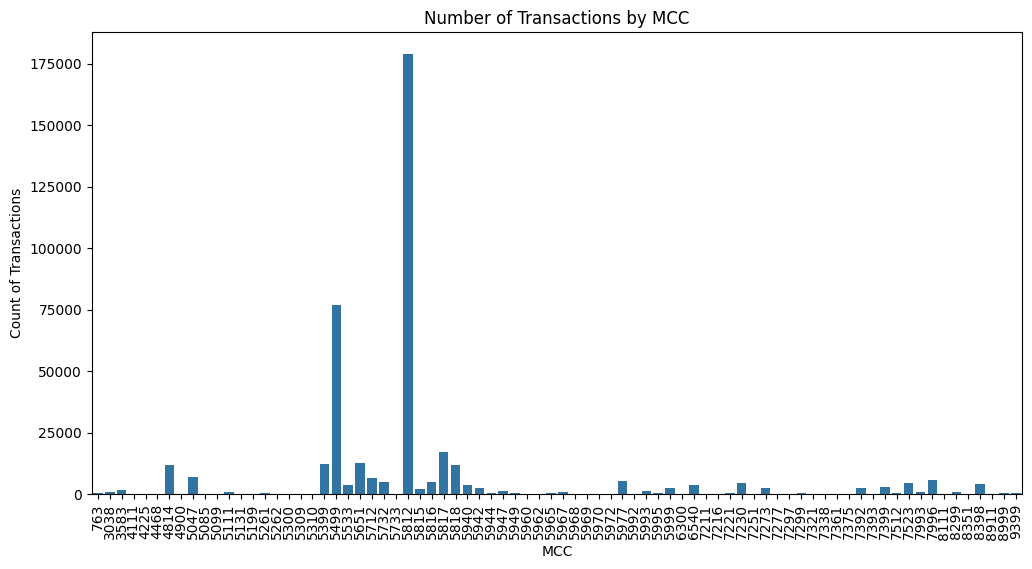

In [14]:
# Transactions by MCC
plt.figure(figsize=(12, 6))
mcc_counts = reward_transactions['MCC'].value_counts()
sns.barplot(x=mcc_counts.index, y=mcc_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Transactions by MCC')
plt.xlabel('MCC')
plt.ylabel('Count of Transactions')
plt.show()

In [15]:
reward_transactions

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413439,1455,Non Participating,25769345,2024-07-07 03:00:00,CHICK-FIL-A #01107 540-362-1160 VA,CHICK-FIL-A #01107,KWD,1002922,11,1847,Super Hero,US,1.11,5812,Fast Food Restaurants,Fast Food Restaurants,Restaurants and Food Services,7,Summer,Restaurants and Food Services
413440,1455,Non Participating,25769346,2024-07-07 03:00:00,WEIXIN*Didi Chuxing Shenzhen CN,WEIXIN*Didi Chuxing Shenzhen,KWD,1012208,0,1846,Hero,CN,0.39,5712,Repair Shops and Related Services –Miscellaneous,Miscellaneous Repair Shops,Services and Utilities,7,Summer,Home and Property Services
413441,1455,Non Participating,25769347,2024-07-07 03:00:00,ALIPAY BEIJING CN,ALIPAY,KWD,1012208,0,1846,Hero,CN,0.96,5399,Department Stores,Department Stores,Retail Stores,7,Summer,Retail Stores
413442,1455,Non Participating,25769348,2024-07-07 03:00:00,GS25 JONGRO IKSUNJUM SEOUL KR,GS25 JONGRO IKSUNJUM SEOUL,KWD,1105144,0,1846,Hero,KR,0.94,5399,Variety Stores,Variety Stores,Retail Stores,7,Summer,Retail Stores


Users Profilings With MCC Frequency

In [16]:
#Aggregation of the data by user and MCC
user_mcc_counts = reward_transactions.groupby(['FK_BusinessUserId', 'MCC']).size().unstack(fill_value=0)

In [17]:
user_mcc_counts

MCC,763,3038,3583,4111,4225,4468,4814,4900,5047,5085,...,7523,7993,7996,8111,8299,8351,8398,8911,8999,9399
FK_BusinessUserId,,,,,,,,,,,,,,,,,,,,,
976481,0,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
976482,0,0,0,0,0,0,0,0,5,0,...,0,0,1,0,0,0,0,0,0,0
976483,0,1,3,0,0,0,3,0,6,0,...,1,0,0,0,0,0,1,0,0,0
976484,0,0,0,0,0,0,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
976485,0,0,27,0,0,0,12,0,2,0,...,2,1,13,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1124919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1124944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Normalizing the data to get the frequency of transactions for each MCC
#Dividing each user's MCC counts by the total number of transactions for that user to get the frequency of transactions for each MCC.
user_mcc_frequency = user_mcc_counts.div(user_mcc_counts.sum(axis=1), axis=0)

In [19]:
user_mcc_frequency

MCC,763,3038,3583,4111,4225,4468,4814,4900,5047,5085,...,7523,7993,7996,8111,8299,8351,8398,8911,8999,9399
FK_BusinessUserId,,,,,,,,,,,,,,,,,,,,,
976481,0.0,0.055556,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.018519,0.0,0.0,0.0,0.000000,0.0,0.0,0.037037
976482,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.125000,0.0,...,0.000000,0.000000,0.025000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
976483,0.0,0.007194,0.021583,0.0,0.0,0.0,0.021583,0.0,0.043165,0.0,...,0.007194,0.000000,0.000000,0.0,0.0,0.0,0.007194,0.0,0.0,0.000000
976484,0.0,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,...,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
976485,0.0,0.000000,0.055670,0.0,0.0,0.0,0.024742,0.0,0.004124,0.0,...,0.004124,0.002062,0.026804,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124902,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1124919,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000
1124944,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [20]:
user_aggregates = reward_transactions.groupby('FK_BusinessUserId').agg(
    total_transactions=('TrxId', 'count'),
    total_amount_spent=('TotalPaid', 'sum'),
    avg_points_rewarded=('PointsRewarded', 'mean'),
    avg_amount_spent=('TotalPaid', 'mean'),
    last_transaction_date=('TrxDate', 'max')
).reset_index()

In [21]:
# reward_transactions['hour_of_day'] = reward_transactions['TrxDate'].dt.hour
# user_aggregates['most_common_hour'] = reward_transactions.groupby('FK_BusinessUserId')['hour_of_day'].agg(lambda x: x.mode()[0]).reset_index(drop=True)


In [22]:
# Calculate the total transaction amount for each MCC for each user
mcc_transaction_amount = reward_transactions.groupby(['FK_BusinessUserId', 'MCC'])['TotalPaid'].sum().unstack(fill_value=0).reset_index()

# Rename columns for clarity
mcc_transaction_amount.columns = ['FK_BusinessUserId'] + [f'total_amount_mcc_{mcc}' for mcc in mcc_transaction_amount.columns if mcc != 'FK_BusinessUserId']

# Merge with user_aggregates
user_aggregates = pd.merge(user_aggregates, mcc_transaction_amount, on='FK_BusinessUserId', how='left')

In [23]:
from datetime import date
# Calculating Recency (days since last transaction)
current_date = pd.to_datetime(date.today())  
user_aggregates['recency'] = (current_date - user_aggregates['last_transaction_date']).dt.days
user_aggregates = user_aggregates.drop(columns=['last_transaction_date'])

In [24]:
# Temporal Features
reward_transactions['TrxDate'] = pd.to_datetime(reward_transactions['TrxDate'])
reward_transactions['day_of_week'] = reward_transactions['TrxDate'].dt.dayofweek
reward_transactions['month'] = reward_transactions['TrxDate'].dt.month
reward_transactions['season'] = reward_transactions['TrxDate'].dt.month % 12 // 3 + 1

In [25]:
user_temporal_aggregates = reward_transactions.groupby('FK_BusinessUserId').agg(
    most_common_day_of_week=('day_of_week', lambda x: x.mode()[0]),
    most_common_month=('month', lambda x: x.mode()[0]),
    most_common_season=('season', lambda x: x.mode()[0])
).reset_index()

In [26]:
user_aggregates = pd.merge(user_aggregates, user_temporal_aggregates, on='FK_BusinessUserId')

In [27]:
user_aggregates

,FK_BusinessUserId,total_transactions,total_amount_spent,avg_points_rewarded,avg_amount_spent,total_amount_mcc_763,total_amount_mcc_3038,total_amount_mcc_3583,total_amount_mcc_4111,total_amount_mcc_4225,...,total_amount_mcc_8299,total_amount_mcc_8351,total_amount_mcc_8398,total_amount_mcc_8911,total_amount_mcc_8999,total_amount_mcc_9399,recency,most_common_day_of_week,most_common_month,most_common_season
0,976481,54,1136.25,210.148148,21.041667,0.0,204.53,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,68.06,20,0,4,2
1,976482,40,422.74,105.150000,10.568500,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,72,0,4,1
2,976483,139,1905.77,137.266187,13.710576,0.0,251.70,88.46,0.0,0.0,...,0.00,0.0,12.5,0.0,0.0,0.00,18,5,5,2
3,976484,30,214.26,70.833333,7.142000,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,20,6,2,1
4,976485,485,6016.55,126.503093,12.405258,0.0,0.00,1122.46,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,21,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820,1124902,1,7.95,79.000000,7.950000,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,19,5,7,3
17821,1124919,1,39.63,396.000000,39.630000,0.0,0.00,0.00,0.0,0.0,...,39.63,0.0,0.0,0.0,0.0,0.00,19,5,7,3
17822,1124944,2,22.00,109.500000,11.000000,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,18,6,7,3
17823,1125078,1,3.75,37.000000,3.750000,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,18,6,7,3


In [28]:
#most frequent mcc for each user and mcc frequencies
mcc_counts = reward_transactions.groupby(['FK_BusinessUserId', 'MCC']).size().unstack(fill_value=0)
most_frequent_mcc = mcc_counts.idxmax(axis=1).reset_index()
most_frequent_mcc.columns = ['FK_BusinessUserId', 'most_frequent_mcc']

In [29]:
#merging user_aggregates with most frequent mcc for each user
user_aggregates = pd.merge(user_aggregates, most_frequent_mcc, on='FK_BusinessUserId')


In [30]:
user_aggregates

,FK_BusinessUserId,total_transactions,total_amount_spent,avg_points_rewarded,avg_amount_spent,total_amount_mcc_763,total_amount_mcc_3038,total_amount_mcc_3583,total_amount_mcc_4111,total_amount_mcc_4225,...,total_amount_mcc_8351,total_amount_mcc_8398,total_amount_mcc_8911,total_amount_mcc_8999,total_amount_mcc_9399,recency,most_common_day_of_week,most_common_month,most_common_season,most_frequent_mcc
0,976481,54,1136.25,210.148148,21.041667,0.0,204.53,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,68.06,20,0,4,2,5499
1,976482,40,422.74,105.150000,10.568500,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,72,0,4,1,5812
2,976483,139,1905.77,137.266187,13.710576,0.0,251.70,88.46,0.0,0.0,...,0.0,12.5,0.0,0.0,0.00,18,5,5,2,5812
3,976484,30,214.26,70.833333,7.142000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,20,6,2,1,5812
4,976485,485,6016.55,126.503093,12.405258,0.0,0.00,1122.46,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,21,0,2,1,5812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820,1124902,1,7.95,79.000000,7.950000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,19,5,7,3,5499
17821,1124919,1,39.63,396.000000,39.630000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,19,5,7,3,8299
17822,1124944,2,22.00,109.500000,11.000000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,18,6,7,3,5499
17823,1125078,1,3.75,37.000000,3.750000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,18,6,7,3,5499


In [31]:
#most frequent location calculation
location_counts = reward_transactions.groupby(['FK_BusinessUserId', 'Location']).size().unstack(fill_value=0)
most_frequent_location = location_counts.idxmax(axis=1).reset_index()
most_frequent_location.columns = ['FK_BusinessUserId', 'most_frequent_location']
user_aggregates = pd.merge(user_aggregates, most_frequent_location, on='FK_BusinessUserId')


In [32]:
user_aggregates

,FK_BusinessUserId,total_transactions,total_amount_spent,avg_points_rewarded,avg_amount_spent,total_amount_mcc_763,total_amount_mcc_3038,total_amount_mcc_3583,total_amount_mcc_4111,total_amount_mcc_4225,...,total_amount_mcc_8398,total_amount_mcc_8911,total_amount_mcc_8999,total_amount_mcc_9399,recency,most_common_day_of_week,most_common_month,most_common_season,most_frequent_mcc,most_frequent_location
0,976481,54,1136.25,210.148148,21.041667,0.0,204.53,0.00,0.0,0.0,...,0.0,0.0,0.0,68.06,20,0,4,2,5499,KW
1,976482,40,422.74,105.150000,10.568500,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,72,0,4,1,5812,KW
2,976483,139,1905.77,137.266187,13.710576,0.0,251.70,88.46,0.0,0.0,...,12.5,0.0,0.0,0.00,18,5,5,2,5812,KW
3,976484,30,214.26,70.833333,7.142000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,20,6,2,1,5812,KW
4,976485,485,6016.55,126.503093,12.405258,0.0,0.00,1122.46,0.0,0.0,...,0.0,0.0,0.0,0.00,21,0,2,1,5812,KW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820,1124902,1,7.95,79.000000,7.950000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,19,5,7,3,5499,KW
17821,1124919,1,39.63,396.000000,39.630000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,19,5,7,3,8299,US
17822,1124944,2,22.00,109.500000,11.000000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,18,6,7,3,5499,KW
17823,1125078,1,3.75,37.000000,3.750000,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,18,6,7,3,5499,KW


In [33]:
# Calculate the number of unique MCCs
# Add MCC frequencies
mcc_frequencies = mcc_counts.div(mcc_counts.sum(axis=1), axis=0).reset_index()
user_aggregates = pd.merge(user_aggregates, mcc_frequencies, on='FK_BusinessUserId')
user_aggregates['unique_mccs'] = mcc_counts.gt(0).sum(axis=1).reset_index(drop=True)


In [34]:
pd.set_option('display.max_columns', None)
user_aggregates

,FK_BusinessUserId,total_transactions,total_amount_spent,avg_points_rewarded,avg_amount_spent,total_amount_mcc_763,total_amount_mcc_3038,total_amount_mcc_3583,total_amount_mcc_4111,total_amount_mcc_4225,total_amount_mcc_4468,total_amount_mcc_4814,total_amount_mcc_4900,total_amount_mcc_5047,total_amount_mcc_5085,total_amount_mcc_5099,total_amount_mcc_5111,total_amount_mcc_5131,total_amount_mcc_5199,total_amount_mcc_5261,total_amount_mcc_5262,total_amount_mcc_5300,total_amount_mcc_5309,total_amount_mcc_5310,total_amount_mcc_5399,total_amount_mcc_5499,total_amount_mcc_5533,total_amount_mcc_5651,total_amount_mcc_5712,total_amount_mcc_5732,total_amount_mcc_5733,total_amount_mcc_5812,total_amount_mcc_5815,total_amount_mcc_5816,total_amount_mcc_5817,total_amount_mcc_5818,total_amount_mcc_5940,total_amount_mcc_5942,total_amount_mcc_5944,total_amount_mcc_5947,total_amount_mcc_5949,total_amount_mcc_5960,total_amount_mcc_5962,total_amount_mcc_5965,total_amount_mcc_5967,total_amount_mcc_5968,total_amount_mcc_5969,total_amount_mcc_5970,total_amount_mcc_5972,total_amount_mcc_5977,total_amount_mcc_5992,total_amount_mcc_5993,total_amount_mcc_5995,total_amount_mcc_5999,total_amount_mcc_6300,total_amount_mcc_6540,total_amount_mcc_7211,total_amount_mcc_7216,total_amount_mcc_7221,total_amount_mcc_7230,total_amount_mcc_7251,total_amount_mcc_7273,total_amount_mcc_7277,total_amount_mcc_7297,total_amount_mcc_7299,total_amount_mcc_7321,total_amount_mcc_7338,total_amount_mcc_7361,total_amount_mcc_7375,total_amount_mcc_7392,total_amount_mcc_7393,total_amount_mcc_7399,total_amount_mcc_7512,total_amount_mcc_7523,total_amount_mcc_7993,total_amount_mcc_7996,total_amount_mcc_8111,total_amount_mcc_8299,total_amount_mcc_8351,total_amount_mcc_8398,total_amount_mcc_8911,total_amount_mcc_8999,total_amount_mcc_9399,recency,most_common_day_of_week,most_common_month,most_common_season,most_frequent_mcc,most_frequent_location,763,3038,3583,4111,4225,4468,4814,4900,5047,5085,5099,5111,5131,5199,5261,5262,5300,5309,5310,5399,5499,5533,5651,5712,5732,5733,5812,5815,5816,5817,5818,5940,5942,5944,5947,5949,5960,5962,5965,5967,5968,5969,5970,5972,5977,5992,5993,5995,5999,6300,6540,7211,7216,7221,7230,7251,7273,7277,7297,7299,7321,7338,7361,7375,7392,7393,7399,7512,7523,7993,7996,8111,8299,8351,8398,8911,8999,9399,unique_mccs
0,976481,54,1136.25,210.148148,21.041667,0.0,204.53,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.25,460.49,32.0,147.92,0.00,5.00,0.0,0.00,0.0,0.00,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.00,0.0,0.00,0.0,0.0,0.0,0.0,68.06,20,0,4,2,5499,KW,0.0,0.055556,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.037037,0.611111,0.018519,0.111111,0.000000,0.018519,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.092593,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018519,0.0,0.0,0.0,0.000000,0.0,0.0,0.037037,9
1,976482,40,422.74,105.150000,10.568500,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,138.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,73.59,0.0,24.40,14.55,25.50,0.0,105.75,0.0,0.00,0.0,0.0,0.0,16.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.1,0.0,0.00,0.0,0.0,0.0,5.95,0.0,0.00,0.0,0.0,0.0,0.0,0.00,72,0,4,1,5812,KW,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.025000,0.050000,0.025000,0.0,0.475000,0.0,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.025000,0.0,0.000000,0.0,

In [35]:
reward_transactions['is_weekend'] = reward_transactions['TrxDate'].dt.weekday >= 5
user_aggregates['weekend_transactions'] = reward_transactions.groupby('FK_BusinessUserId')['is_weekend'].sum().reset_index(drop=True)
user_aggregates['weekday_transactions'] = reward_transactions.groupby('FK_BusinessUserId')['is_weekend'].apply(lambda x: (~x).sum()).reset_index(drop=True)


In [36]:
# Calculate average transactions per month
reward_transactions['year_month'] = reward_transactions['TrxDate'].dt.to_period('M')


In [37]:
reward_transactions.head()

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC,day_of_week,month,season,is_weekend,year_month
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services,3,1,1,False,2024-01
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services,5,1,1,True,2024-01
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services,2,1,1,False,2024-01
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services,2,1,1,False,2024-01
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services,3,1,1,False,2024-01


In [38]:
unique_mcc_df = reward_transactions[['MCC', 'Detailed MCC']].drop_duplicates().reset_index(drop=True)


In [39]:
unique_mcc_df.to_excel(Path(SOURCEDATA/"MCC_Details.xlsx"),index=False)

In [40]:
monthly_transactions = reward_transactions.groupby(['FK_BusinessUserId', 'year_month']).size().unstack(fill_value=0)


In [41]:
avg_transactions_per_month = monthly_transactions.mean(axis=1).reset_index()
avg_transactions_per_month.columns = ['FK_BusinessUserId', 'avg_transactions_per_month']

In [42]:
user_aggregates = pd.merge(user_aggregates, avg_transactions_per_month, on='FK_BusinessUserId')

In [43]:
user_aggregates

,FK_BusinessUserId,total_transactions,total_amount_spent,avg_points_rewarded,avg_amount_spent,total_amount_mcc_763,total_amount_mcc_3038,total_amount_mcc_3583,total_amount_mcc_4111,total_amount_mcc_4225,total_amount_mcc_4468,total_amount_mcc_4814,total_amount_mcc_4900,total_amount_mcc_5047,total_amount_mcc_5085,total_amount_mcc_5099,total_amount_mcc_5111,total_amount_mcc_5131,total_amount_mcc_5199,total_amount_mcc_5261,total_amount_mcc_5262,total_amount_mcc_5300,total_amount_mcc_5309,total_amount_mcc_5310,total_amount_mcc_5399,total_amount_mcc_5499,total_amount_mcc_5533,total_amount_mcc_5651,total_amount_mcc_5712,total_amount_mcc_5732,total_amount_mcc_5733,total_amount_mcc_5812,total_amount_mcc_5815,total_amount_mcc_5816,total_amount_mcc_5817,total_amount_mcc_5818,total_amount_mcc_5940,total_amount_mcc_5942,total_amount_mcc_5944,total_amount_mcc_5947,total_amount_mcc_5949,total_amount_mcc_5960,total_amount_mcc_5962,total_amount_mcc_5965,total_amount_mcc_5967,total_amount_mcc_5968,total_amount_mcc_5969,total_amount_mcc_5970,total_amount_mcc_5972,total_amount_mcc_5977,total_amount_mcc_5992,total_amount_mcc_5993,total_amount_mcc_5995,total_amount_mcc_5999,total_amount_mcc_6300,total_amount_mcc_6540,total_amount_mcc_7211,total_amount_mcc_7216,total_amount_mcc_7221,total_amount_mcc_7230,total_amount_mcc_7251,total_amount_mcc_7273,total_amount_mcc_7277,total_amount_mcc_7297,total_amount_mcc_7299,total_amount_mcc_7321,total_amount_mcc_7338,total_amount_mcc_7361,total_amount_mcc_7375,total_amount_mcc_7392,total_amount_mcc_7393,total_amount_mcc_7399,total_amount_mcc_7512,total_amount_mcc_7523,total_amount_mcc_7993,total_amount_mcc_7996,total_amount_mcc_8111,total_amount_mcc_8299,total_amount_mcc_8351,total_amount_mcc_8398,total_amount_mcc_8911,total_amount_mcc_8999,total_amount_mcc_9399,recency,most_common_day_of_week,most_common_month,most_common_season,most_frequent_mcc,most_frequent_location,763,3038,3583,4111,4225,4468,4814,4900,5047,5085,5099,5111,5131,5199,5261,5262,5300,5309,5310,5399,5499,5533,5651,5712,5732,5733,5812,5815,5816,5817,5818,5940,5942,5944,5947,5949,5960,5962,5965,5967,5968,5969,5970,5972,5977,5992,5993,5995,5999,6300,6540,7211,7216,7221,7230,7251,7273,7277,7297,7299,7321,7338,7361,7375,7392,7393,7399,7512,7523,7993,7996,8111,8299,8351,8398,8911,8999,9399,unique_mccs,weekend_transactions,weekday_transactions,avg_transactions_per_month
0,976481,54,1136.25,210.148148,21.041667,0.0,204.53,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.25,460.49,32.0,147.92,0.00,5.00,0.0,0.00,0.0,0.00,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.00,0.0,0.00,0.0,0.0,0.0,0.0,68.06,20,0,4,2,5499,KW,0.0,0.055556,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.037037,0.611111,0.018519,0.111111,0.000000,0.018519,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.092593,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018519,0.0,0.0,0.0,0.000000,0.0,0.0,0.037037,9,15,39,7.714286
1,976482,40,422.74,105.150000,10.568500,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,138.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,73.59,0.0,24.40,14.55,25.50,0.0,105.75,0.0,0.00,0.0,0.0,0.0,16.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.1,0.0,0.00,0.0,0.0,0.0,5.95,0.0,0.00,0.0,0.0,0.0,0.0,0.00,72,0,4,1,5812,KW,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.025000,0.050000,0.025000,0.0,0.475000,0.0,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,

In [44]:
user_aggregates.to_excel(Path(SOURCEDATA/"User_Profiles.xlsx"),index=False)